<a href="https://colab.research.google.com/github/Bergenstein/projects/blob/main/GCD_USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas-datareader googlefinance cufflinks

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.9 MB/s eta 0:00:00
  Created wheel for googlefinance: filename=googlefinance-0.7-py3-none-any.whl size=2563 sha256=da9a42604e38aee4481c57b80fcf70a98f540d63e9637a44332762a24f97612d
  Stored in directory: /root/.cache/pip/wheels/40/ea/e4/14ef314e3d37a0545a3556c17b445445bee5750ab24338cbb8
Successfully built googlefinance


In [4]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import yfinance as yf
import googlefinance as gf
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
import plotly
import cufflinks as cf
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.models import Sequential
from keras.layers import Dense

from keras.optimizers import Adam, RMSprop
import random
cf.go_offline()
%matplotlib inline

sns.set_style('darkgrid')
cf.go_offline()
%matplotlib inline

raw_data=pd.read_csv("GHSUSD=X.csv")
raw_data.info

<bound method DataFrame.info of             Date      Open      High       Low     Close  Adj Close  Volume
0     2013-06-18  0.499500  0.502614  0.498132  0.503677   0.503677     0.0
1     2013-06-19  0.502791  0.502791  0.498008  0.503398   0.503398     0.0
2     2013-06-20  0.502664  0.502664  0.497512  0.499052   0.499052     0.0
3     2013-06-21  0.503956  0.503956  0.497512  0.503322   0.503322     0.0
4     2013-06-24  0.498231  0.502614  0.496894  0.498952   0.498952     0.0
...          ...       ...       ...       ...       ...        ...     ...
2631  2023-07-19  0.087944  0.090909  0.087944  0.090909   0.090909     0.0
2632  2023-07-20  0.088224  0.090909  0.086327  0.090909   0.090909     0.0
2633  2023-07-21  0.085826  0.086351  0.085826  0.086580   0.086580     0.0
2634  2023-07-24  0.086376  0.086507  0.085991  0.086426   0.086426     0.0
2635  2023-07-25  0.086957  0.090909  0.086957  0.090909   0.090909     0.0

[2636 rows x 7 columns]>

In [5]:
raw_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-06-18,0.499500,0.502614,0.498132,0.503677,0.503677,0.0
1,2013-06-19,0.502791,0.502791,0.498008,0.503398,0.503398,0.0
2,2013-06-20,0.502664,0.502664,0.497512,0.499052,0.499052,0.0
3,2013-06-21,0.503956,0.503956,0.497512,0.503322,0.503322,0.0
4,2013-06-24,0.498231,0.502614,0.496894,0.498952,0.498952,0.0


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data=raw_data.copy()

In [8]:
del data["Volume"]

In [9]:
data.head()

,Date,Open,High,Low,Close,Adj Close
0,2013-06-18,0.499500,0.502614,0.498132,0.503677,0.503677
1,2013-06-19,0.502791,0.502791,0.498008,0.503398,0.503398
2,2013-06-20,0.502664,0.502664,0.497512,0.499052,0.499052
3,2013-06-21,0.503956,0.503956,0.497512,0.503322,0.503322
4,2013-06-24,0.498231,0.502614,0.496894,0.498952,0.498952


In [10]:
data.index

RangeIndex(start=0, stop=2636, step=1)

<Axes: xlabel='Date'>

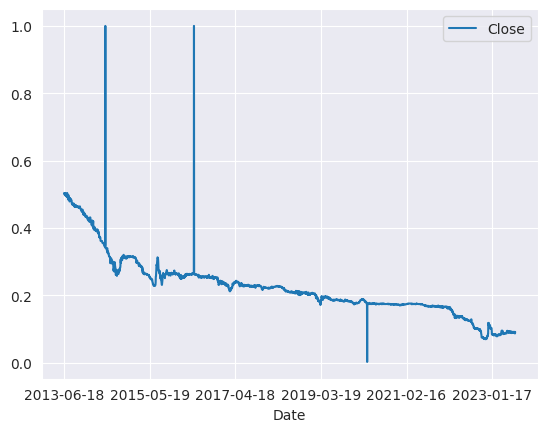

In [11]:
data.plot.line(x="Date", y="Close")

In [12]:
raw_data.dropna(inplace=True)

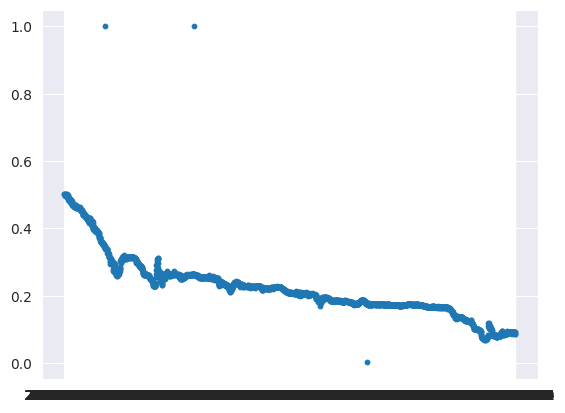

In [13]:
plt.scatter(raw_data["Date"], raw_data["Close"], s=10)
plt.show()

Text(0, 0.5, 'Opening Prices')

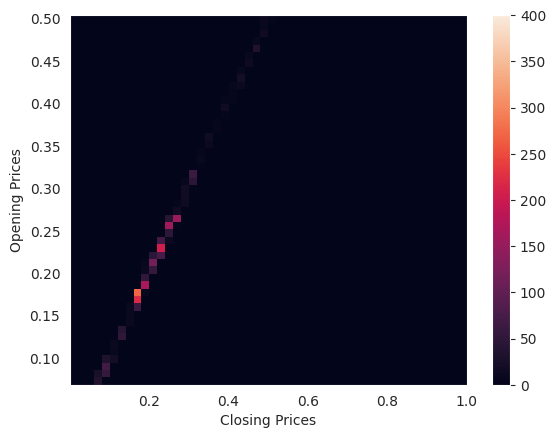

In [14]:
plt.hist2d(raw_data['Close'], raw_data['Open'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Closing Prices')
plt.ylabel('Opening Prices')

In [15]:
data["Tomorrow"]=data["Close"].shift(-1)

In [16]:
raw_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2631,2023-07-19,0.087944,0.090909,0.087944,0.090909,0.090909,0.0
2632,2023-07-20,0.088224,0.090909,0.086327,0.090909,0.090909,0.0
2633,2023-07-21,0.085826,0.086351,0.085826,0.086580,0.086580,0.0
2634,2023-07-24,0.086376,0.086507,0.085991,0.086426,0.086426,0.0
2635,2023-07-25,0.086957,0.090909,0.086957,0.090909,0.090909,0.0


In [17]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Tomorrow
2631,2023-07-19,0.087944,0.090909,0.087944,0.090909,0.090909,0.090909
2632,2023-07-20,0.088224,0.090909,0.086327,0.090909,0.090909,0.086580
2633,2023-07-21,0.085826,0.086351,0.085826,0.086580,0.086580,0.086426
2634,2023-07-24,0.086376,0.086507,0.085991,0.086426,0.086426,0.090909
2635,2023-07-25,0.086957,0.090909,0.086957,0.090909,0.090909,NaN


In [18]:
data["Target"]=(data["Tomorrow"]>data["Close"]).astype(int)

In [19]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Tomorrow,Target
2631,2023-07-19,0.087944,0.090909,0.087944,0.090909,0.090909,0.090909,0
2632,2023-07-20,0.088224,0.090909,0.086327,0.090909,0.090909,0.086580,0
2633,2023-07-21,0.085826,0.086351,0.085826,0.086580,0.086580,0.086426,0
2634,2023-07-24,0.086376,0.086507,0.085991,0.086426,0.086426,0.090909,1
2635,2023-07-25,0.086957,0.090909,0.086957,0.090909,0.090909,NaN,0


In [20]:
data["return"]=np.log(data["Close"]/data["Close"].shift(1))
data["direction"]=np.where(data["return"]>0, 1,0)
data

,Date,Open,High,Low,Close,Adj Close,Tomorrow,Target,return,direction
0,2013-06-18,0.499500,0.502614,0.498132,0.503677,0.503677,0.503398,0,NaN,0
1,2013-06-19,0.502791,0.502791,0.498008,0.503398,0.503398,0.499052,0,-0.000554,0
2,2013-06-20,0.502664,0.502664,0.497512,0.499052,0.499052,0.503322,1,-0.008671,0
3,2013-06-21,0.503956,0.503956,0.497512,0.503322,0.503322,0.498952,0,0.008520,1
4,2013-06-24,0.498231,0.502614,0.496894,0.498952,0.498952,0.503297,1,-0.008720,0
...,...,...,...,...,...,...,...,...,...,...
2631,2023-07-19,0.087944,0.090909,0.087944,0.090909,0.090909,0.090909,0,0.000000,0
2632,2023-07-20,0.088224,0.090909,0.086327,0.090909,0.090909,0.086580,0,0.000000,0
2633,2023-07-21,0.085826,0.086351,0.085826,0.086580,0.086580,0.086426,0,-0.048790,0
2634,2023-07-24,0.086376,0.086507,0.085991,0.086426,0.086426,0.090909,1,-0.001780,0


In [21]:
lags=5

cols=[]

for lag in range(1, lags+1):
    col=f'lag_{lag}'
    data[col]=data['return'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)

## Adding some additional strategies:
### 1. Momentum
### 2. Volatility
### 3. Distance

In [22]:
data["momentum"]=data["return"].rolling(5).mean().shift(1)
data["volatility"]=data["return"].rolling(20).std().shift(1)

data['distance'] = (data['Close'] - data['Close'].rolling(50).mean()).shift(1)
data.dropna(inplace=True)

cols.extend(["momentum", "volatility", "distance"])

In [23]:
data

,Date,Open,High,Low,Close,Adj Close,Tomorrow,Target,return,direction,lag_1,lag_2,lag_3,lag_4,lag_5,momentum,volatility,distance
56,2013-09-04,0.468296,0.468296,0.468296,0.467946,0.467946,0.469021,1,0.001872,1,-0.012267,0.011518,-0.003183,-0.004042,0.003057,-9.832962e-04,0.006042,-0.018258
57,2013-09-05,0.466984,0.466984,0.466984,0.469021,0.469021,0.463757,0,0.002295,1,0.001872,-0.012267,0.011518,-0.003183,-0.004042,-1.220342e-03,0.005965,-0.016749
58,2013-09-06,0.463930,0.463930,0.463930,0.463757,0.463757,0.466135,1,-0.011287,0,0.002295,0.001872,-0.012267,0.011518,-0.003183,4.691172e-05,0.006001,-0.015141
59,2013-09-09,0.464922,0.464922,0.464922,0.466135,0.466135,0.467071,1,0.005115,1,-0.011287,0.002295,0.001872,-0.012267,0.011518,-1.573928e-03,0.006378,-0.019745
60,2013-09-10,0.462642,0.463306,0.462642,0.467071,0.467071,0.463435,0,0.002006,1,0.005115,-0.011287,0.002295,0.001872,-0.012267,-2.854663e-03,0.006551,-0.016744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630,2023-07-18,0.088168,0.088168,0.088135,0.090909,0.090909,0.090909,0,0.029040,1,-0.029040,0.000000,0.000000,0.000000,0.023709,-1.066151e-03,0.023312,-0.002118
2631,2023-07-19,0.087944,0.090909,0.087944,0.090909,0.090909,0.090909,0,0.000000,0,0.029040,-0.029040,0.000000,0.000000,0.000000,4.371503e-17,0.023406,0.000390
2632,2023-07-20,0.088224,0.090909,0.086327,0.090909,0.090909,0.086580,0,0.000000,0,0.000000,0.029040,-0.029040,0.000000,0.000000,4.371503e-17,0.023406,0.000304
2633,2023-07-21,0.085826,0.086351,0.085826,0.086580,0.086580,0.086426,0,-0.048790,0,0.000000,0.000000,0.029040,-0.029040,0.000000,4.371503e-17,0.023379,0.000217


### all the way up to the last 100 days used for training data

In [24]:
training_data=data.iloc[:-100].copy()
training_data

,Date,Open,High,Low,Close,Adj Close,Tomorrow,Target,return,direction,lag_1,lag_2,lag_3,lag_4,lag_5,momentum,volatility,distance
56,2013-09-04,0.468296,0.468296,0.468296,0.467946,0.467946,0.469021,1,0.001872,1,-0.012267,0.011518,-0.003183,-0.004042,0.003057,-0.000983,0.006042,-0.018258
57,2013-09-05,0.466984,0.466984,0.466984,0.469021,0.469021,0.463757,0,0.002295,1,0.001872,-0.012267,0.011518,-0.003183,-0.004042,-0.001220,0.005965,-0.016749
58,2013-09-06,0.463930,0.463930,0.463930,0.463757,0.463757,0.466135,1,-0.011287,0,0.002295,0.001872,-0.012267,0.011518,-0.003183,0.000047,0.006001,-0.015141
59,2013-09-09,0.464922,0.464922,0.464922,0.466135,0.466135,0.467071,1,0.005115,1,-0.011287,0.002295,0.001872,-0.012267,0.011518,-0.001574,0.006378,-0.019745
60,2013-09-10,0.462642,0.463306,0.462642,0.467071,0.467071,0.463435,0,0.002006,1,0.005115,-0.011287,0.002295,0.001872,-0.012267,-0.002855,0.006551,-0.016744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2023-02-28,0.078159,0.078593,0.078159,0.079365,0.079365,0.078593,0,0.019184,1,0.002327,-0.003932,-0.006812,-0.000548,-0.005889,-0.002970,0.018437,-0.012860
2531,2023-03-01,0.078399,0.080000,0.078399,0.078593,0.078593,0.079365,1,-0.009775,0,0.019184,0.002327,-0.003932,-0.006812,-0.000548,0.002044,0.018175,-0.010586
2532,2023-03-02,0.078442,0.079365,0.078339,0.079365,0.079365,0.080000,1,0.009775,1,-0.009775,0.019184,0.002327,-0.003932,-0.006812,0.000199,0.017858,-0.010657
2533,2023-03-03,0.078456,0.080645,0.078456,0.080000,0.080000,0.080645,1,0.007969,1,0.009775,-0.009775,0.019184,0.002327,-0.003932,0.003516,0.016804,-0.009250


In [25]:
data

,Date,Open,High,Low,Close,Adj Close,Tomorrow,Target,return,direction,lag_1,lag_2,lag_3,lag_4,lag_5,momentum,volatility,distance
56,2013-09-04,0.468296,0.468296,0.468296,0.467946,0.467946,0.469021,1,0.001872,1,-0.012267,0.011518,-0.003183,-0.004042,0.003057,-9.832962e-04,0.006042,-0.018258
57,2013-09-05,0.466984,0.466984,0.466984,0.469021,0.469021,0.463757,0,0.002295,1,0.001872,-0.012267,0.011518,-0.003183,-0.004042,-1.220342e-03,0.005965,-0.016749
58,2013-09-06,0.463930,0.463930,0.463930,0.463757,0.463757,0.466135,1,-0.011287,0,0.002295,0.001872,-0.012267,0.011518,-0.003183,4.691172e-05,0.006001,-0.015141
59,2013-09-09,0.464922,0.464922,0.464922,0.466135,0.466135,0.467071,1,0.005115,1,-0.011287,0.002295,0.001872,-0.012267,0.011518,-1.573928e-03,0.006378,-0.019745
60,2013-09-10,0.462642,0.463306,0.462642,0.467071,0.467071,0.463435,0,0.002006,1,0.005115,-0.011287,0.002295,0.001872,-0.012267,-2.854663e-03,0.006551,-0.016744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630,2023-07-18,0.088168,0.088168,0.088135,0.090909,0.090909,0.090909,0,0.029040,1,-0.029040,0.000000,0.000000,0.000000,0.023709,-1.066151e-03,0.023312,-0.002118
2631,2023-07-19,0.087944,0.090909,0.087944,0.090909,0.090909,0.090909,0,0.000000,0,0.029040,-0.029040,0.000000,0.000000,0.000000,4.371503e-17,0.023406,0.000390
2632,2023-07-20,0.088224,0.090909,0.086327,0.090909,0.090909,0.086580,0,0.000000,0,0.000000,0.029040,-0.029040,0.000000,0.000000,4.371503e-17,0.023406,0.000304
2633,2023-07-21,0.085826,0.086351,0.085826,0.086580,0.086580,0.086426,0,-0.048790,0,0.000000,0.000000,0.029040,-0.029040,0.000000,4.371503e-17,0.023379,0.000217


### Last 100 days used for testing data

In [26]:
testing_data=data.iloc[-100:].copy().dropna()
testing_data

,Date,Open,High,Low,Close,Adj Close,Tomorrow,Target,return,direction,lag_1,lag_2,lag_3,lag_4,lag_5,momentum,volatility,distance
2535,2023-03-07,0.080182,0.081301,0.079849,0.080645,0.080645,0.082645,1,0.000000,0,0.008030,0.007969,0.009775,-0.009775,0.019184,7.036599e-03,0.015938,-0.006973
2536,2023-03-08,0.078991,0.083333,0.078991,0.082645,0.082645,0.083333,1,0.024498,1,0.000000,0.008030,0.007969,0.009775,-0.009775,3.199868e-03,0.014491,-0.006480
2537,2023-03-09,0.081149,0.083333,0.081149,0.083333,0.083333,0.084034,1,0.008290,1,0.024498,0.000000,0.008030,0.007969,0.009775,1.005434e-02,0.015628,-0.004028
2538,2023-03-10,0.081976,0.084034,0.081116,0.084034,0.084034,0.081525,0,0.008377,1,0.008290,0.024498,0.000000,0.008030,0.007969,9.757433e-03,0.015749,-0.002784
2539,2023-03-13,0.081396,0.082645,0.081396,0.081525,0.081525,0.081967,1,-0.030312,0,0.008377,0.008290,0.024498,0.000000,0.008030,9.838969e-03,0.015749,-0.001542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630,2023-07-18,0.088168,0.088168,0.088135,0.090909,0.090909,0.090909,0,0.029040,1,-0.029040,0.000000,0.000000,0.000000,0.023709,-1.066151e-03,0.023312,-0.002118
2631,2023-07-19,0.087944,0.090909,0.087944,0.090909,0.090909,0.090909,0,0.000000,0,0.029040,-0.029040,0.000000,0.000000,0.000000,4.371503e-17,0.023406,0.000390
2632,2023-07-20,0.088224,0.090909,0.086327,0.090909,0.090909,0.086580,0,0.000000,0,0.000000,0.029040,-0.029040,0.000000,0.000000,4.371503e-17,0.023406,0.000304
2633,2023-07-21,0.085826,0.086351,0.085826,0.086580,0.086580,0.086426,0,-0.048790,0,0.000000,0.000000,0.029040,-0.029040,0.000000,4.371503e-17,0.023379,0.000217


### Normalizing data:

In [27]:
## dropping date before normalization

del training_data["Date"]
del testing_data["Date"]

In [28]:
##seeding random number generator
def set_seeds(seed=100)->None:
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

set_seeds()

In [29]:
mu_train, std_train=training_data.mean(), training_data.std();

In [30]:
training_data_normalized=(training_data-mu_train)/std_train

In [31]:
mu_test, std_test=testing_data.mean(), testing_data.std();

In [32]:
testing_data_normalized=(testing_data-mu_test)/std_test

## Now Training the modue using a Convolutional Neural Network

In [33]:
set_seeds()
optimiser=tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

model = Sequential()
model.add(Dense(32, activation='relu',
                input_shape=(len(cols),)))
model.add(Dense(32, activation='relu'))
tf.keras.layers.Dropout(0.25)
model.add(Dense(32, activation='relu'))
tf.keras.layers.Dropout(0.25)
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimiser,
              loss='binary_crossentropy',
              metrics=['accuracy'])

77/77 [==============================] - 0s 3ms/step - loss: 0.5982 - accuracy: 0.6890
CPU times: user 12.4 s, sys: 589 ms, total: 13 s
Wall time: 22 s


[0.5981806516647339, 0.6890069246292114]

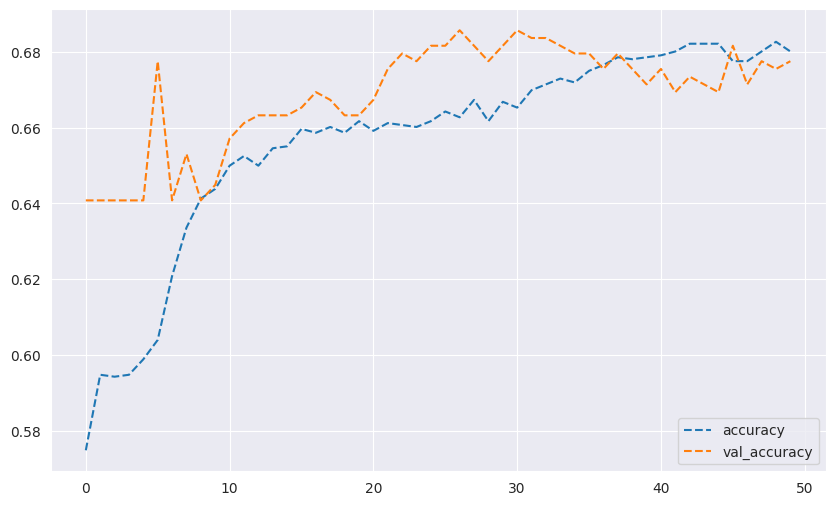

In [34]:
%%time
model.fit(training_data_normalized[cols], training_data['direction'],
          verbose=False, epochs=50, validation_split=0.2, shuffle=False)
res=pd.DataFrame(model.history.history)
res[["accuracy", "val_accuracy"]].plot(figsize=(10,6), style="--")

model.evaluate(training_data_normalized[cols], training_data["direction"])

In [35]:
res

,loss,accuracy,val_loss,val_accuracy
0,0.691108,0.574859,0.667099,0.640816
1,0.676802,0.594788,0.659745,0.640816
2,0.671360,0.594277,0.654247,0.640816
3,0.666772,0.594788,0.648176,0.640816
4,0.663163,0.598876,0.643614,0.640816
5,0.657381,0.603986,0.636008,0.677551
6,0.651524,0.620848,0.637875,0.640816
7,0.649826,0.633623,0.630511,0.653061
8,0.643526,0.641288,0.630964,0.640816
9,0.641010,0.643843,0.627861,0.644898


In [36]:
training_data_normalized[cols]

,lag_1,lag_2,lag_3,lag_4,lag_5,momentum,volatility,distance
56,-0.081709,0.086450,-0.017555,-0.023594,0.026707,-0.009640,-0.165813,-0.631662
57,0.018296,-0.081786,0.086424,-0.017518,-0.023501,-0.017872,-0.166356,-0.564885
58,0.021287,0.018219,-0.081811,0.086461,-0.017425,0.026135,-0.166103,-0.493738
59,-0.074774,0.021211,0.018194,-0.081774,0.086555,-0.030151,-0.163442,-0.697410
60,0.041233,-0.074851,0.021186,0.018230,-0.081681,-0.074626,-0.162220,-0.564676
...,...,...,...,...,...,...,...,...
2530,0.021520,-0.022828,-0.043223,0.001120,-0.036568,-0.078649,-0.078389,-0.392844
2531,0.140743,0.021443,-0.022853,-0.043186,0.001213,0.095489,-0.080238,-0.292268
2532,-0.064080,0.140667,0.021418,-0.022816,-0.043093,0.031402,-0.082477,-0.295415
2533,0.074195,-0.064156,0.140642,0.021455,-0.022723,0.146600,-0.089912,-0.233178


77/77 [==============================] - 0s 1ms/step


<Axes: >

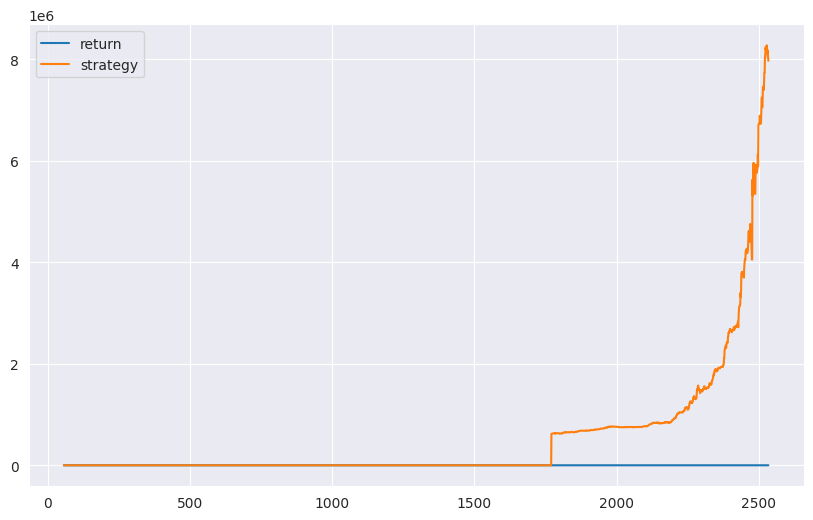

In [37]:
pred=np.where(model.predict(training_data_normalized[cols])>0.6, 1, 0)
training_data["prediction"]=np.where(pred>0, 1, -1)
training_data["strategy"]=training_data["prediction"]*training_data["return"]
training_data[["return", "strategy"]].sum().apply(np.exp)

training_data[["return", "strategy"]].cumsum().apply(np.exp).plot(figsize=(10,6))

In [38]:
training_data["prediction"]

56     -1
57     -1
58     -1
59     -1
60     -1
       ..
2530   -1
2531   -1
2532   -1
2533   -1
2534   -1
Name: prediction, Length: 2447, dtype: int64

In [39]:
training_data["prediction"].value_counts()

-1    2132
 1     315
Name: prediction, dtype: int64

In [40]:
training_data.tail()

,Open,High,Low,Close,Adj Close,Tomorrow,Target,return,direction,lag_1,lag_2,lag_3,lag_4,lag_5,momentum,volatility,distance,prediction,strategy
2530,0.078159,0.078593,0.078159,0.079365,0.079365,0.078593,0,0.019184,1,0.002327,-0.003932,-0.006812,-0.000548,-0.005889,-0.002970,0.018437,-0.012860,-1,-0.019184
2531,0.078399,0.080000,0.078399,0.078593,0.078593,0.079365,1,-0.009775,0,0.019184,0.002327,-0.003932,-0.006812,-0.000548,0.002044,0.018175,-0.010586,-1,0.009775
2532,0.078442,0.079365,0.078339,0.079365,0.079365,0.080000,1,0.009775,1,-0.009775,0.019184,0.002327,-0.003932,-0.006812,0.000199,0.017858,-0.010657,-1,-0.009775
2533,0.078456,0.080645,0.078456,0.080000,0.080000,0.080645,1,0.007969,1,0.009775,-0.009775,0.019184,0.002327,-0.003932,0.003516,0.016804,-0.009250,-1,-0.007969
2534,0.079362,0.080645,0.079362,0.080645,0.080645,0.080645,0,0.008030,1,0.007969,0.009775,-0.009775,0.019184,0.002327,0.005896,0.016958,-0.008110,-1,-0.008030


In [ ]:
# plt.hist2d(training_data['direction'], training_data['prediction'], bins=(50, 50), vmax=400)
# plt.colorbar()
# plt.xlabel('Direction')
# plt.ylabel('Prediction')

## Calculating Classification Report and Confusion Matrix

In [ ]:
def confusion_matrix(y_true, y_pred):
    unique_classes = np.unique(np.concatenate((y_true, y_pred)))
    num_classes = len(unique_classes)
    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)

    for i in range(num_classes):
        for j in range(num_classes):
            conf_matrix[i, j] = np.sum((y_true == unique_classes[i]) & (y_pred == unique_classes[j]))

    return conf_matrix

In [ ]:
confusion_matrix(training_data["direction"], training_data["prediction"])

array([[   0,    0,    0],
       [1344,    0,  134],
       [ 608,    0,  361]])

In [ ]:
def classification_report(y_true, y_pred):
    unique_classes = np.unique(np.concatenate((y_true, y_pred)))
    num_classes = len(unique_classes)
    report = {"class": [], "precision": [], "recall": [], "f1-score": [], "support": []}

    for i in range(num_classes):
        tp = np.sum((y_true == unique_classes[i]) & (y_pred == unique_classes[i]))
        fp = np.sum((y_true != unique_classes[i]) & (y_pred == unique_classes[i]))
        fn = np.sum((y_true == unique_classes[i]) & (y_pred != unique_classes[i]))
        tn = np.sum((y_true != unique_classes[i]) & (y_pred != unique_classes[i]))

        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1_score = 2 * (precision * recall) / (precision + recall)
        support = tp + fn

        report["class"].append(unique_classes[i])
        report["precision"].append(precision)
        report["recall"].append(recall)
        report["f1-score"].append(f1_score)
        report["support"].append(support)

    return report

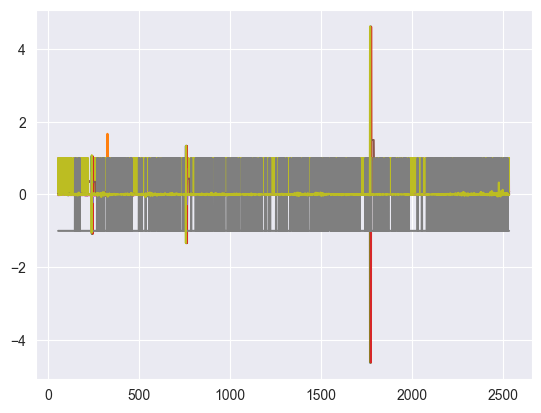

In [ ]:
plt.plot(training_data)
plt.show()

## Another Strategy Experiment

In [41]:
data=raw_data.copy()
del data["Volume"]

In [42]:
cols=[]
data["return"]=np.log(data['Close']/data['Close'].shift(1))
for momentum in [5, 15, 30, 60, 120]:
    col="position_{}".format(momentum)
    data[col]=np.sign(data["return"].rolling(momentum).mean())
    cols.append(col)

<Axes: >

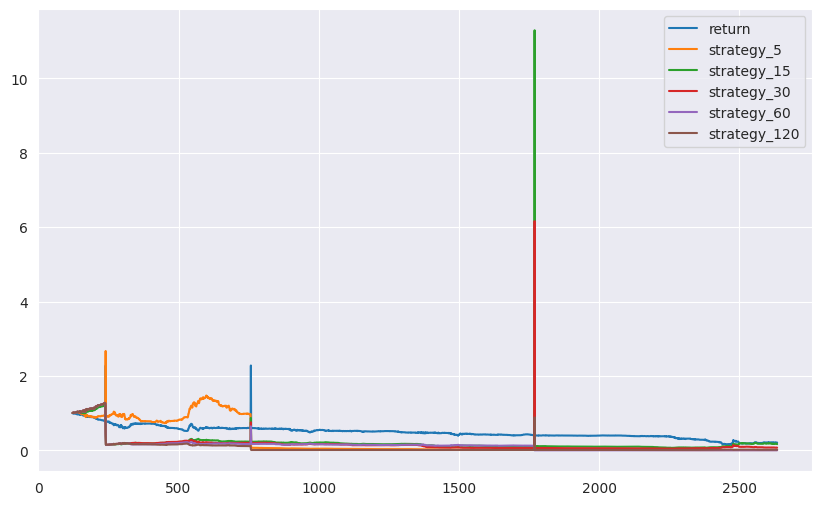

In [43]:
strats=["return"]
for col in cols:
    strat="strategy_{}".format(col.split("_")[1])
    data[strat]=data[col].shift(1)*data["return"]
    strats.append(strat)
data[strats].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))

## What happens with Leverage

<Axes: >

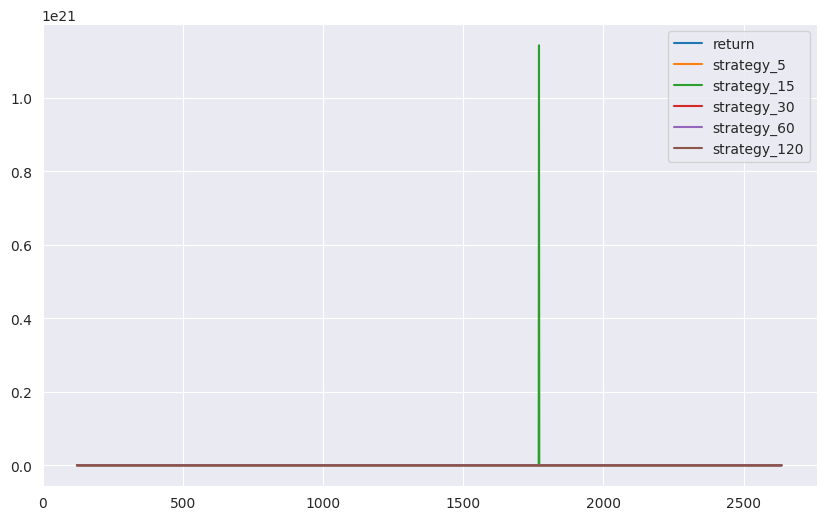

In [44]:
data[strats].dropna().cumsum().apply(lambda x: x*20).apply(np.exp).plot(figsize=(10,6)) #leverage of 20:1(5% margin)

## Real Time Data

In [45]:
# import tpqoa

# class MomentumTrader(tpqoa.tpqoa):
#     def __init__(self, conf_file, instrument, bar_length,
#                  momentum, units, *args, **kwargs):
#         super(MomentumTrader, self).__init__(conf_file)
#         self.position = 0
#         self.instrument = instrument
#         self.momentum = momentum
#         self.bar_length = bar_length
#         self.units = units
#         self.raw_data = pd.DataFrame()  # Initialize raw_data as an empty DataFrame
#         self.min_length = self.momentum + 1

#     def on_success(self, time, bid, ask):
#         print(self.ticks, end=' ')

#         # Create a new DataFrame with bid and ask values and a timestamp index
#         new_data = pd.DataFrame({"bid": bid, "ask": ask}, index=[pd.Timestamp(time)])

#         # Concatenate the new_data DataFrame with self.raw_data
#         self.raw_data = pd.concat([self.raw_data, new_data])

#         self.data = self.raw_data.resample(self.bar_length, label="right").last().ffill().iloc[:-1]
#         self.data["mid"] = self.data.mean(axis=1)
#         self.data["returns"] = np.log(self.data["mid"] / self.data["mid"].shift(1))
#         self.data["position"] = np.sign(self.data["returns"].rolling(self.momentum).mean())

#         if len(self.data) > self.min_length:
#             self.min_length += 1
#             if self.data["position"].iloc[-1] == 1:
#                 if self.position == 0:
#                     self.create_order(self.instrument, self.units)
#                 elif self.position == -1:
#                     self.create_order(self.instrument, self.units * 2)
#                 self.position = 1
#             elif self.data["position"].iloc[-1] == -1:
#                 if self.position == 0:
#                     self.create_order(self.instrument, -self.units)
#                 elif self.position == 1:
#                     self.create_order(self.instrument, -self.units * 2)
#                 self.position = -1


In [46]:
# api=tpqoa.tpqoa('tpqoa/oanda.cfg')

In [47]:
# help(api.get_history)

In [48]:
# api

In [ ]:
# shift_val=1
# momentum_calendar_period=60
# volatility_calendar_period=momentum_calendar_period*5
# distance_calendar_period=volatility_calendar_period*3
# data["return"]=np.log(data['c']/data['c'].shift(shift_val))
# data["momentum"]=data["return"].rolling(momentum_calendar_period).mean().shift(shift_val)
# data["vol"]=data["return"].rolling(volatility_calendar_period).std().shift(shift_val)
# data["distance"]=(data['c']-data['c'].rolling(distance_calendar_period).mean()).shift(shift_val)
# data.dropna(inplace=True)

# data.head()
# data.to_csv("df.csv")

In [ ]:
# instrument = 'GBP_USD'
# start = '2010-08-10'
# end = '2023-07-25'
# granularity = 'M1'
# price = 'M'
# data = api.get_history(instrument, start, end,
#                               granularity, price)

In [ ]:
# mt=MomentumTrader('oanda.cfg', instrument=instrument, bar_length='10s', momentum=6, units=10000)

In [ ]:
# mt.stream_data(mt.instrument, stop=10)

In [ ]:
# fx_ticker='GHS_USD'

In [ ]:
# from googlefinance.get import get_datum

,Open,High,Low,Close,Volume
date,,,,,


## Event BackTesting

In [49]:
class BackTestBase(object):
    def __init__(self,symbol, start, end, amount,
                 ftc=0.0, ptc=0.0, verbose=True):
        self.symbol=symbol
        self.start=start
        self.end=end
        self.initial_amount=amount
        self.amount=amount #starting cash-balance val
        self.ftc=ftc #fixed transactional cost
        self.ptc=ptc #proportional transactional cost
        self.units=0 # stores units of intrument,eg, num shares in portfolio
        self.position=0 #sets init pos to be market neutral
        self.trades=0 #sets init num trades to zero
        self.verbose=verbose
        self.get_data() #retrieves EOD data from CSV file
    def get_data(self):
        raw=pd.read_csv('DATA',
                       index_col=0, parse_dates=True).dropna()
        raw=pd.DataFrame(raw[self.symbol])
        raw=raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw['return']=np.log(raw/raw.shift(1))
        self.data=raw.dropna()
    def plot_data(self, cols=None):
        if cols is None:
            cols=["price"]
        self.data["price"].plot(figsize=(10,6), title=self.symbol)
    def get_date_price(self, bar):
        date=str(self.data.index[bar])[:10]
        price=self.data.price.iloc[bar]
        return date, price
    def print_balance(self, bar):
        date, price=self.get_date_price(bar)
        print(f"{date} | current balance {self.amount:.2f}")
    def print_net_worth(self, bar):
        date, price=self.get_date_price(bar)
        networth=self.units*price+self.amount
        print(f"{date} | current networth is {networth:.2f}")

    def place_buy_order(self, bar, units=None, amount=None):
        data, price=self.get_date_price(bar)
        assert price>0
        if units is None:
            units=int(amount/price)

        self.amount-=(units*price)*(1+self.ptc)+self.ftc
        self.units+=units
        self.trades+=1
        if self.verbose:
            print(f"{date} | selling {units} units at {price:.2f}")
            self.print_balance(bar)
            self.print_net_worth(bar)
    def place_sell_order(self,  bar, units=None, amount=None):
        date, price=self.get_date_price(bar)
        assert price>0
        if units is None:
            units=int(amount/price)
        self.amount+=(price*units)*(1+self.ptc)-self.ftc
        self.units-=units
        self.trades+=1
        if self.verbose:
            print(f"{date} | selling {units} units at {price:.2f}")
            self.print_balance(bar)
            self.print_net_worth(bar)
    def close_out(self, bar):
        date, price=self.get_date_price(bar)
        assert price>0
        self.amount+=self.units*price
        self.units=0
        self.trades+=1
        if self.verbose:
            print(f'{date} | inventory {self.units} units at {price:.2f}')
            print('=' * 55)
            print('Final balance   [$] {:.2f}'.format(self.amount))
            performance = ((self.amount - self.initial_amount) /
                    self.initial_amount * 100)
            print('Net Performance [%] {:.2f}'.format(performance))
            print('Trades Executed [#] {}'.format(self.trades))
            print('=' * 55)
# if __name__=="__main__":
#     bb=BackTestBase('AAPL.O', '2010-1-1', '2019-12-31', 10000)
#     print(bb.data.info())
#     print(bb.data.tail())
#     bb.plot_data()

## LSTM

In [50]:
from tensorflow.keras.layers import LSTM, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredLogarithmicError, MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError


In [51]:
def df_to_X_y(df, window_size=5):
    df_as_np=df.to_numpy()
    x=[]
    y=[]
    for i in range(len(df_as_np)-window_size):
        row=[[a] for a in df_as_np[i:i+5]]
        x.append(row)
        label=df_as_np[i+5]
        y.append(label)
    return np.array(x), np.array(y)

In [52]:
temp=data["Close"] #also try adjusted close and other features

In [53]:
Window_Size=5
x,y=df_to_X_y(temp, Window_Size)
x.shape, y.shape

((2627, 5, 1), (2627,))

In [54]:
x_train, y_train=x[:1800], y[:1800]
x_val, y_val=x[1800:2100], y[1800:2100]
x_test, y_test=x[2100:], y[2100:]
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((1800, 5, 1), (1800,), (300, 5, 1), (300,), (527, 5, 1), (527,))

## Model 1

In [55]:
model1=Sequential()
model1.add(InputLayer(input_shape=(5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, "relu"))
model1.add(Dense(1, "sigmoid"))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense_5 (Dense)             (None, 8)                 520       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [56]:
cp=ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredLogarithmicError(), optimizer=Adam(learning_rate=0.0001), metrics=[MeanSquaredLogarithmicError()])
model1.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)

Epoch 1/10
57/57 [==============================] - 7s 38ms/step - loss: 0.0317 - mean_squared_logarithmic_error: 0.0316 - val_loss: 0.0539 - val_mean_squared_logarithmic_error: 0.0540
Epoch 2/10
57/57 [==============================] - 1s 14ms/step - loss: 0.0269 - mean_squared_logarithmic_error: 0.0270 - val_loss: 0.0470 - val_mean_squared_logarithmic_error: 0.0470
Epoch 3/10
57/57 [==============================] - 1s 20ms/step - loss: 0.0211 - mean_squared_logarithmic_error: 0.0210 - val_loss: 0.0371 - val_mean_squared_logarithmic_error: 0.0372
Epoch 4/10
57/57 [==============================] - 1s 22ms/step - loss: 0.0139 - mean_squared_logarithmic_error: 0.0138 - val_loss: 0.0240 - val_mean_squared_logarithmic_error: 0.0241
Epoch 5/10
57/57 [==============================] - 1s 20ms/step - loss: 0.0083 - mean_squared_logarithmic_error: 0.0083 - val_loss: 0.0134 - val_mean_squared_logarithmic_error: 0.0134
Epoch 6/10
57/57 [==============================] - 2s 27ms/step - loss: 0.

In [ ]:
from tensorflow.keras.models import load_model

In [57]:
train_predictions=model1.predict(x_train).flatten()
train_results=pd.DataFrame(data={"Train Predictions": train_predictions,
                                 "Actuals": y_train})

57/57 [==============================] - 1s 2ms/step


In [58]:
train_results

,Train Predictions,Actuals
0,0.218101,0.503297
1,0.218226,0.499675
2,0.218394,0.495688
3,0.218305,0.496746
4,0.218571,0.497265
...,...,...
1795,0.283643,0.175439
1796,0.283702,0.175131
1797,0.283788,0.175439
1798,0.283835,0.175439


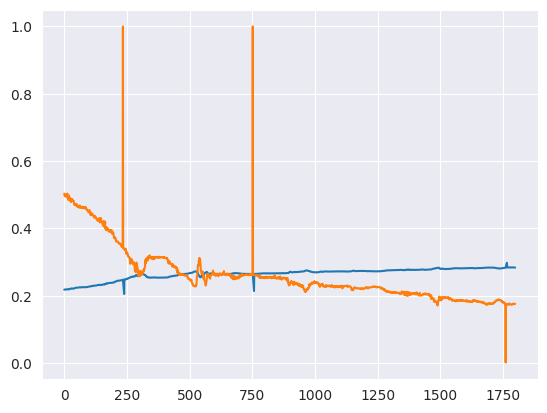

In [59]:
plt.plot(train_results["Train Predictions"])
plt.plot(train_results["Actuals"])

## Model 2

In [ ]:
# model=Sequential()
# model.add(LSTM(64, activation="relu", input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
# model.add(LSTM(32, activation="relu", return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(trainY.shape[1]))

# model.compile(optimizer='adam', loss='mse')
# model.summary()

In [69]:
model2=Sequential()
model2.add(LSTM(64, input_shape=(5,1), activation="relu", return_sequences=True))
model2.add(LSTM(64, activation="relu", return_sequences=True))
model2.add(LSTM(64, activation="relu", return_sequences=True))
model2.add(LSTM(32, activation="relu", return_sequences=False))

model2.add(Dropout(0.2))
model2.add(Dense(8, "relu"))
model2.add(Dense(1, "sigmoid"))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 5, 64)             16896     
                                                                 
 lstm_4 (LSTM)               (None, 5, 64)             33024     
                                                                 
 lstm_5 (LSTM)               (None, 5, 64)             33024     
                                                                 
 lstm_6 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 8)                 264       
                                                                 
 dense_10 (Dense)            (None, 1)                

In [70]:
model2.compile(loss=MeanSquaredLogarithmicError(), optimizer=Adam(learning_rate=0.0001))
model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30)

Epoch 1/30
57/57 [==============================] - 9s 34ms/step - loss: 0.0338 - val_loss: 0.0581
Epoch 2/30
57/57 [==============================] - 1s 21ms/step - loss: 0.0318 - val_loss: 0.0544
Epoch 3/30
57/57 [==============================] - 1s 22ms/step - loss: 0.0280 - val_loss: 0.0465
Epoch 4/30
57/57 [==============================] - 1s 21ms/step - loss: 0.0187 - val_loss: 0.0234
Epoch 5/30
57/57 [==============================] - 1s 22ms/step - loss: 0.0065 - val_loss: 0.0082
Epoch 6/30
57/57 [==============================] - 1s 23ms/step - loss: 0.0052 - val_loss: 0.0066
Epoch 7/30
57/57 [==============================] - 2s 32ms/step - loss: 0.0048 - val_loss: 0.0058
Epoch 8/30
57/57 [==============================] - 2s 35ms/step - loss: 0.0043 - val_loss: 0.0065
Epoch 9/30
57/57 [==============================] - 2s 31ms/step - loss: 0.0038 - val_loss: 0.0047
Epoch 10/30
57/57 [==============================] - 1s 21ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 11/

In [71]:
train_predictions=model2.predict(x_train).flatten()
train_results=pd.DataFrame(data={"Train Predictions": train_predictions,
                                 "Actuals": y_train})

57/57 [==============================] - 1s 6ms/step


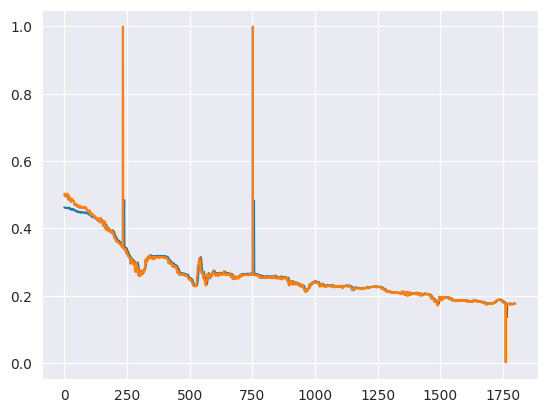

In [72]:
plt.plot(train_results["Train Predictions"])
plt.plot(train_results["Actuals"])

In [73]:
train_results

,Train Predictions,Actuals
0,0.462395,0.503297
1,0.462073,0.499675
2,0.461737,0.495688
3,0.462051,0.496746
4,0.461668,0.497265
...,...,...
1795,0.177649,0.175439
1796,0.177444,0.175131
1797,0.177031,0.175439
1798,0.176796,0.175439


In [74]:
model2.history

In [ ]:
# test_loss, test_accuracy=model2.evaluate(x_test, y_test)

In [75]:
test_predictions=model2.predict(x_test).flatten()
test_results=pd.DataFrame(data={"Test Predictions": test_predictions,
                                 "Actuals": y_test})

17/17 [==============================] - 0s 6ms/step


In [76]:
test_results

,Test Predictions,Actuals
0,0.171673,0.168569
1,0.171851,0.169393
2,0.171942,0.168350
3,0.171804,0.169205
4,0.171498,0.169492
...,...,...
522,0.132805,0.090909
523,0.132773,0.090909
524,0.132668,0.086580
525,0.132510,0.086426


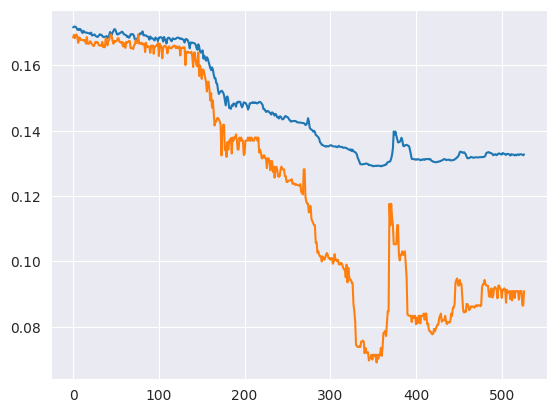

In [77]:
plt.plot(test_results["Test Predictions"])
plt.plot(test_results["Actuals"])

In [ ]:
training_data_normalized.shape[1]

17

In [ ]:
model=Sequential()
model.add(LSTM(64, activation="relu", input_shape=(training_data_normalized.shape[0], training_data_normalized.shape[1]), return_sequences=True))
model.add(LSTM(32, activation="relu", return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(traini.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

NameError: name 'trainY' is not defined

## Modularization

In [ ]:
def prepare_data(ticker: str, interesting_col: str,
                 train_idx:int, val_idx:int, window_size: int):
    ##
    data=pd.read_csv("LOCAL_DATA")
    #check if we need to drop the first column
    mu, std=data.mean(), data.std()
    data_normalized=(data-mu)/std
    def df_to_X_y(df, window_size=window_size):
        df_as_np=df.to_numpy()
        x=[]
        y=[]
        for i in range(len(df_as_np)-window_size):
            row=[[a] for a in df_as_np[i:i+5]]
            x.append(row)
            label=df_as_np[i+5]
            y.append(label)
        return np.array(x), np.array(y)
    temp=data[interesting_col]
    x, y=df_to_X_y(temp, window_size)

    x_train, y_train=x[:train_idx], y[:train_idx]
    x_val, y_val=x[train_idx:val_idx], y[train_idx:val_idx]
    x_test, y_test=x[val_idx:], y[val_idx:]
    return x_train, y_train, x_test, y_test, x_val, y_val


In [ ]:
def prepare_model(optimizer, learning_rate, loss,
                  dropout: float, activation: str="relu",
                  initial_depth: int=64, final_activation: str="sigmoid"):
    model=Sequential()
    model.add(LSTM(initial_depth, input_shape=(5,1), activation=activation, return_sequences=True))
    model.add(LSTM(initial_depth/2, activation=activation, return_sequences=False))
    model.add(Dropout(dropout))
    model.add(Dense(8, "relu"))
    model.add(Dense(1, final_activation))
    model.compile(loss=loss, optimizer=optimizer(learning_rate))
    return model

In [ ]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)

# Other Methods and Functions

In [ ]:
api_key_alpha_advantage="VVQIYIXRGH6EF1EC"

In [ ]:
import requests


url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=VVQIYIXRGH6EF1EC'
r = requests.get(url)
data = r.json()


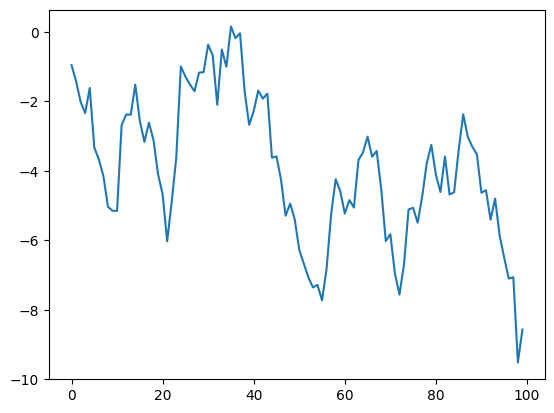

In [ ]:
import matplotlib.pyplot as plt
import random
from torchviz import make_dot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def generate_random_walk(length = 100, mu = 0, sig = 1):
    ts = []
    for i in range(length):
        e = random.gauss(mu, sig)
        if i == 0:
            ts.append(e)
        else:
            ts.append(ts[i - 1] + e)
    return ts


if __name__ == '__main__':
    random.seed(10)
    random_walk = generate_random_walk(100)
    plt.plot(random_walk)
    plt.show()


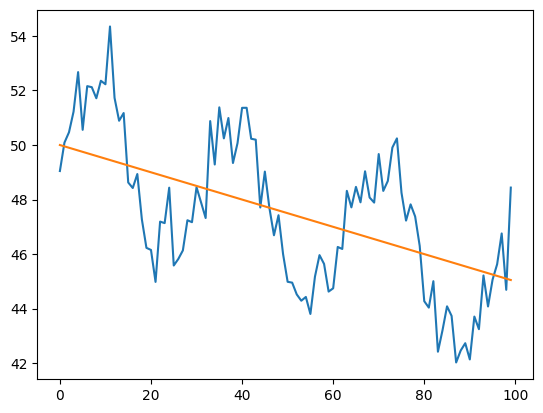

In [ ]:
from math import sin
import matplotlib.pyplot as plt
import random

if __name__ == '__main__':
    random.seed(10)
    length = 100
    A = 50
    B = -.05
    C = 1
    S = 3
    trend = [A + B * i for i in range(length)]
    seasons = [S * sin(i / 5) for i in range(length)]
    noise = [C * random.gauss(0, 1) for _ in range(length)]
    ts = [trend[i] + noise[i] + seasons[i] for i in range(length)]
    plt.plot(ts)
    plt.plot(trend)
    plt.show()


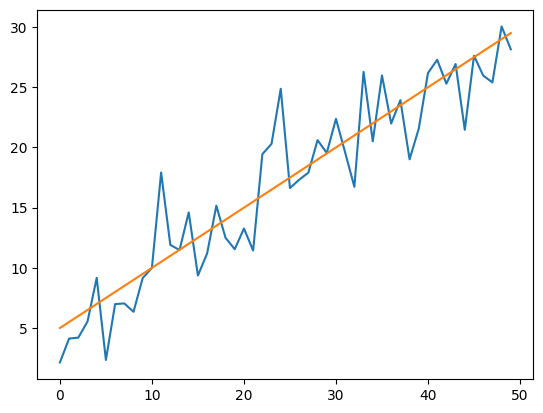

In [ ]:
import matplotlib.pyplot as plt
import random

if __name__ == '__main__':
    random.seed(10)
    length = 50
    A = 5
    B = .5
    C = 3
    trend = [A + B * i for i in range(length)]
    noise = [C * random.gauss(0, 1) for _ in range(length)]
    ts = [trend[i] + noise[i] for i in range(length)]
    plt.plot(ts)
    plt.plot(trend)
    plt.show()


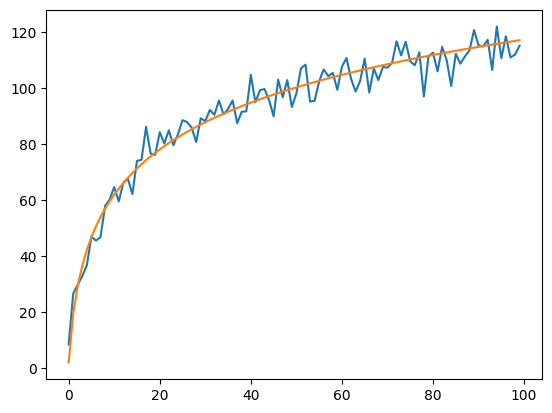

In [ ]:
from math import log

import matplotlib.pyplot as plt
import random

if __name__ == '__main__':
    random.seed(1)
    length = 100
    A = 2
    B = 25
    C = 5
    noise = [C * random.gauss(0, 1) for _ in range(length)]
    trend = [A + B * log(i) for i in range(1, length + 1)]
    ts = [trend[i] + noise[i] for i in range(length)]
    plt.plot(ts)
    plt.plot(trend)
    plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

from_date = '2015-1-1'
to_date = '2020-10-1'
quotes = yf.download('Meta', start = from_date, end = to_date)
closes = quotes['Close'].values
train, test = closes[:-1], closes[-1]

model = ARIMA(train, order = (5, 2, 3))
results = model.fit()

forecast = results.forecast()
predicted = forecast[0]

print(f'Predicted Price on {to_date}: {round(predicted, 2)}$')
print(f'Actual Price on {to_date}: {round(test, 2)}$')


[*********************100%***********************]  1 of 1 completed


/Users/israelbergenstein/anaconda3/envs/qiskit-stable/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/israelbergenstein/anaconda3/envs/qiskit-stable/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Price on 2020-10-1: 260.56$
Actual Price on 2020-10-1: 261.9$


In [ ]:
from statsmodels.tsa.ar_model import AutoReg
import yfinance as yf

quotes = yf.download('Meta', start = '2011-1-1', end = '2021-1-1')

model = AutoReg(quotes['Close'], lags = 2)
model_fit = model.fit()

print(model_fit.params)


[*********************100%***********************]  1 of 1 completed
const       0.140215
Close.L1    0.930913
Close.L2    0.068906
dtype: float64


/Users/israelbergenstein/anaconda3/envs/qiskit-stable/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import yfinance as yf

from_date = '2015-1-1'
to_date = '2020-10-1'
quotes = yf.download('Meta', start = from_date, end = to_date)
closes = quotes['Close'].values
train, test = closes[:-1], closes[-1]

model = ExponentialSmoothing(train)
results = model.fit()

forecast = results.forecast()
predicted = forecast[0]

print(f'Predicted Price on {to_date}: {round(predicted, 2)}$')
print(f'Actual Price on {to_date}: {round(test, 2)}$')


[*********************100%***********************]  1 of 1 completed
Predicted Price on 2020-10-1: 261.48$
Actual Price on 2020-10-1: 261.9$


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import yfinance as yf

from_date = '2015-1-1'
to_date = '2020-10-1'
quotes = yf.download('Meta', start = from_date, end = to_date)
closes = quotes['Close'].values
train, test = closes[:-1], closes[-1]

model = SARIMAX(train, order = (3, 1, 1), seasonal_order = (0, 0, 0, 0))
results = model.fit(disp = 0)

forecast = results.forecast()
predicted = forecast[0]

print(f'Predicted Price on {to_date}: {round(predicted, 2)}$')
print(f'Actual Price on {to_date}: {round(test, 2)}$')


[*********************100%***********************]  1 of 1 completed
Predicted Price on 2020-10-1: 261.3$
Actual Price on 2020-10-1: 261.9$


In [ ]:
pwd

'/Users/israelbergenstein/Desktop/all files/Study/Oxford_MS_CS/Reseearch'

In [ ]:
cd Time-Series-Forecasting-using-Deep-Learning/

/Users/israelbergenstein/Desktop/all files/Study/Oxford_MS_CS/Reseearch/Time-Series-Forecasting-using-Deep-Learning


In [ ]:
from dfdx.function import get_function

In [ ]:
import torch


def get_function(x1_val = 0, x2_val = 0, x3_val = 0, x4_val = 0):
    # variables
    x1 = torch.tensor(x1_val, requires_grad = True, dtype = torch.float32)
    x2 = torch.tensor(x2_val, requires_grad = True, dtype = torch.float32)
    x3 = torch.tensor(x3_val, requires_grad = True, dtype = torch.float32)
    x4 = torch.tensor(x4_val, requires_grad = True, dtype = torch.float32)

    # function
    p1 = x1.pow(3)
    m1 = p1 * x2
    m2 = x3 * x4
    f = m1 + m2

    vars = {'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4}

    return f, vars


if __name__ == '__main__':
    f, _ = get_function(2, 4, 3, 5)
    print(f.item())


47.0


In [ ]:
f, params = get_function(2, 4, 3, 5)

f.backward()

print(f'df_dx1: {params["x1"].grad}')
print(f'df_dx2: {params["x2"].grad}')
print(f'df_dx3: {params["x3"].grad}')
print(f'df_dx4: {params["x4"].grad}')

df_dx1: 48.0
df_dx2: 8.0
df_dx3: 5.0
df_dx4: 3.0


In [ ]:
f, params = get_function(2, 4, 3, 5)

make_dot(f, params).render("./f_torchviz")

# img = mpimg.imread('f_torchviz.png')
# plt.xticks([])
# plt.yticks([])
# plt.imshow(img)
# plt.show()

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
pwd

'/Users/israelbergenstein/Desktop/all files/Study/Oxford_MS_CS/Reseearch/Time-Series-Forecasting-using-Deep-Learning/Chapter 02'

In [ ]:
ls

Icon?            f_torchviz       nn/
dfdx/            layers/          nn_architecture/


In [ ]:
import yfinance

In [ ]:
pwd

'/Users/israelbergenstein/Desktop/all files/Study/Oxford_MS_CS/Reseearch/Time-Series-Forecasting-using-Deep-Learning/Chapter 02'

In [ ]:
cd ~/Desktop/Work_Files/

/Users/israelbergenstein/Desktop/Work_Files


In [ ]:
ls

Algorithmic_Trading_Python/  Market_Making_C++/
Books/                       Python For Algo Trading/
GHS_USD Historical Data.csv  Sports Betting/
LSTM/                        df.csv


In [ ]:
df=pd.read_csv("GHS_USD Historical Data (1).csv").dropna()

df.head()

,Date,Price,Open,High,Low,Vol.,Change %
129,25/01/2023,0.0807,0.0807,0.0818,0.0807,8.71K,0.00%
130,24/01/2023,0.0807,0.0807,0.0837,0.0807,14.88K,0.00%
131,23/01/2023,0.0807,0.0852,0.0852,0.0807,13.09K,-3.35%
132,20/01/2023,0.0835,0.0835,0.0852,0.0813,9.47K,3.47%
133,19/01/2023,0.0807,0.0835,0.0852,0.0807,5.82K,-3.35%


In [ ]:
start = datetime.datetime(2007, 1, 1)
end = datetime.datetime(2022, 12, 1)

currency = yf.Ticker("USD/GHS")
raw_data = currency.history(start=start, end=end)

Failed to get ticker 'USD/GHS' reason: Expecting value: line 1 column 1 (char 0)
USD/GHS: No timezone found, symbol may be delisted


<bound method DataFrame.info of             Date      Open      High       Low     Close  Adj Close  Volume
0     2013-06-18  0.499500  0.502614  0.498132  0.503677   0.503677     0.0
1     2013-06-19  0.502791  0.502791  0.498008  0.503398   0.503398     0.0
2     2013-06-20  0.502664  0.502664  0.497512  0.499052   0.499052     0.0
3     2013-06-21  0.503956  0.503956  0.497512  0.503322   0.503322     0.0
4     2013-06-24  0.498231  0.502614  0.496894  0.498952   0.498952     0.0
...          ...       ...       ...       ...       ...        ...     ...
2631  2023-07-19  0.087944  0.090909  0.087944  0.090909   0.090909     0.0
2632  2023-07-20  0.088224  0.090909  0.086327  0.090909   0.090909     0.0
2633  2023-07-21  0.085826  0.086351  0.085826  0.086580   0.086580     0.0
2634  2023-07-24  0.086376  0.086507  0.085991  0.086426   0.086426     0.0
2635  2023-07-25  0.086957  0.090909  0.086957  0.090909   0.090909     0.0

[2636 rows x 7 columns]>

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-06-18,0.499500,0.502614,0.498132,0.503677,0.503677,0.0
1,2013-06-19,0.502791,0.502791,0.498008,0.503398,0.503398,0.0
2,2013-06-20,0.502664,0.502664,0.497512,0.499052,0.499052,0.0
3,2013-06-21,0.503956,0.503956,0.497512,0.503322,0.503322,0.0
4,2013-06-24,0.498231,0.502614,0.496894,0.498952,0.498952,0.0


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2631,2023-07-19,0.087944,0.090909,0.087944,0.090909,0.090909,0.0
2632,2023-07-20,0.088224,0.090909,0.086327,0.090909,0.090909,0.0
2633,2023-07-21,0.085826,0.086351,0.085826,0.086580,0.086580,0.0
2634,2023-07-24,0.086376,0.086507,0.085991,0.086426,0.086426,0.0
2635,2023-07-25,0.086957,0.090909,0.086957,0.090909,0.090909,0.0
